In [ ]:
# Install required libraries (if not already installed)

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")


df = pd.read_excel('/content/Chart your insights 2.0 (dataset).xlsx')

# Show basic info about the dataset
print("Dataset loaded successfully!")
print(df.info())
print(df.head())

# Memory optimization for large datasets
def optimize_memory(df):
    for col in df.select_dtypes(include=["float64", "int64"]).columns:
        df[col] = pd.to_numeric(df[col], downcast="float")
    return df

df = optimize_memory(df)

# Aggregations for large-scale visualizations
# Summarize numerical data by Age_Category and Sex

# 1. Pie Chart: Gender Distribution
def create_pie_chart(data, column, title):
    data_counts = data[column].value_counts()
    plt.figure(figsize=(3,3))
    plt.pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    plt.title(title)
    plt.show()

create_pie_chart(df, 'Sex', 'Gender Distribution')

# 2. Bar Chart: Health Condition Frequency
def create_bar_chart(data, column, title):
    data_counts = data[column].value_counts()
    plt.figure(figsize=(3,3))
    sns.barplot(x=data_counts.index, y=data_counts.values, palette="Blues_d")
    plt.title(title)
    plt.xlabel(column.replace("_", " "))
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

health_conditions = ['Heart_Disease', 'Depression', 'Arthritis']
for condition in health_conditions:
    create_bar_chart(df, condition, f'Frequency of {condition.replace("_", " ")}')

# 3. Histogram: BMI Distribution
plt.figure(figsize=(6,6))
sns.histplot(df['BMI'], kde=True, color='light orange', bins=30)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

# 4. Line Chart: Alcohol, Fruit, and Vegetable Consumption by Age_Category
plt.figure(figsize=(10,10))
consumption_columns = ['Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption']
for column in consumption_columns:
    sns.lineplot(data=df, x='Age_Category', y=column, label=column.replace("_", " "))
plt.title('Consumption Patterns by Age Group')
plt.xlabel('Age Category')
plt.ylabel('Average Consumption')
plt.legend()
plt.show()

# 5. Scatter Plot: BMI vs Exercise
plt.figure(figsize=(6,6))
sns.scatterplot(data=df, x='BMI', y='Exercise', hue='Sex', style='Sex', palette='Set1')
plt.title('BMI vs Exercise')
plt.xlabel('BMI')
plt.ylabel('Exercise (Yes/No)')
plt.show()

# 6. Heatmap: Correlation Matrix for Numerical Variables
numerical_columns = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption']
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(5,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/Chart your insights 2.0 (dataset).xlsx'

ValueError: Image size of 757651x556 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x600 with 1 Axes>

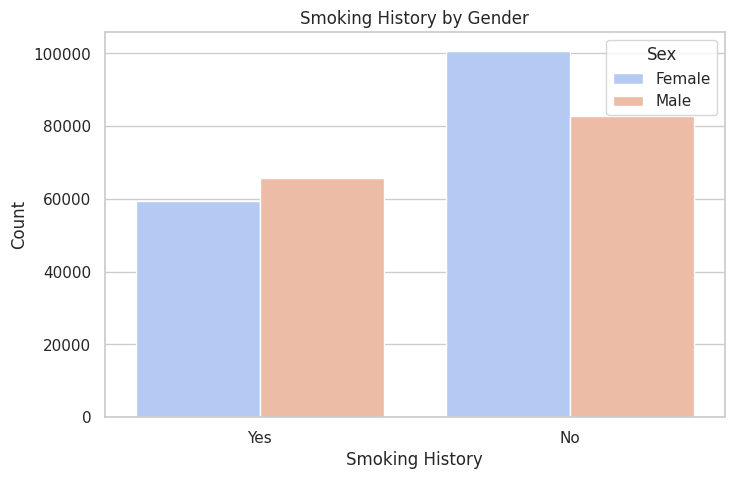

<ipython-input-48-062e95b34166>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='General_Health', y='BMI', palette='Set2')


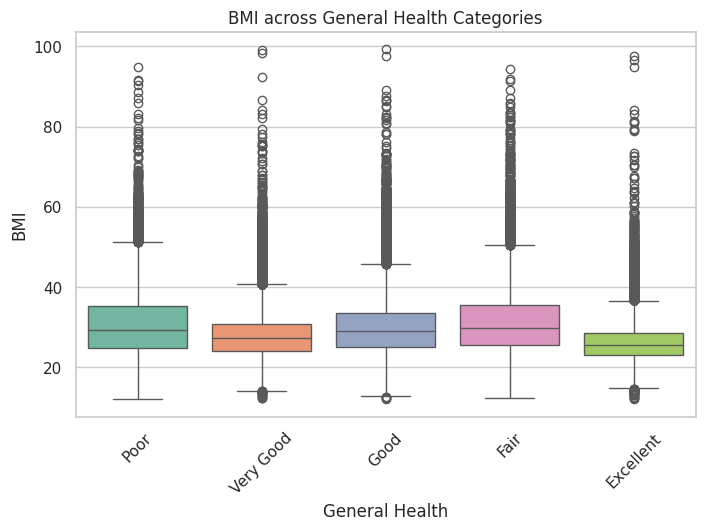

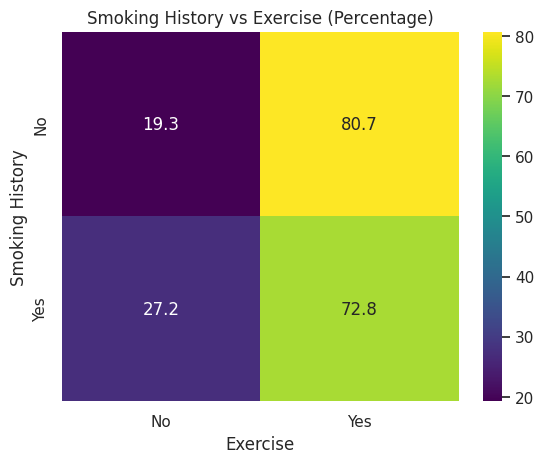

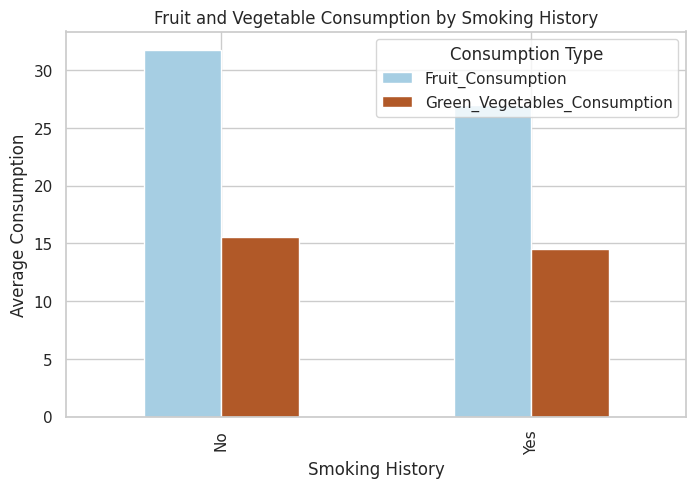

<ipython-input-48-062e95b34166>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Smoking_History', y='BMI', palette='muted')


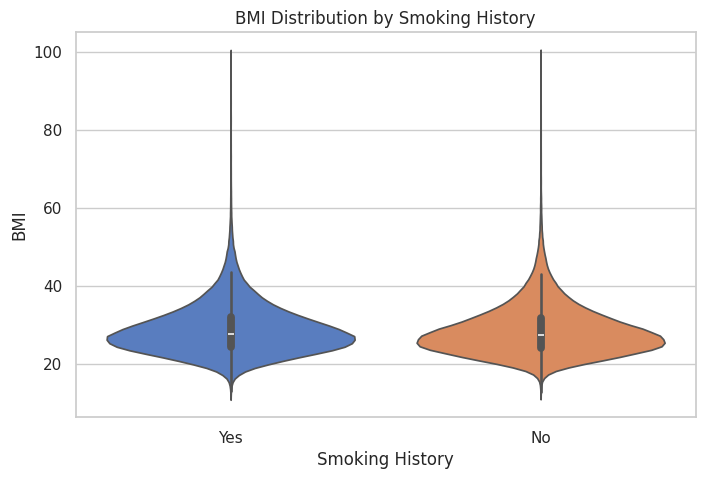

In [ ]:



plt.figure(figsize=(10, 6))
for condition in health_conditions:
    sns.lineplot(data=stacked_data[condition], label=condition.replace("_", " "))
plt.title('Health Condition Trends by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Health Conditions')
plt.show()


plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Smoking_History', hue='Sex', palette='coolwarm')
plt.title('Smoking History by Gender')
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='General_Health', y='BMI', palette='Set2')
plt.title('BMI across General Health Categories')
plt.xlabel('General Health')
plt.ylabel('BMI')
plt.xticks(rotation=45)
plt.show()


behavior_columns = ['Smoking_History', 'Alcohol_Consumption', 'Exercise']
behavior_data = pd.crosstab(df['Smoking_History'], df['Exercise'], normalize='index') * 100
sns.heatmap(behavior_data, annot=True, fmt='.1f', cmap='viridis')
plt.title('Smoking History vs Exercise (Percentage)')
plt.xlabel('Exercise')
plt.ylabel('Smoking History')
plt.show()


smoking_consumption = df.groupby('Smoking_History')[['Fruit_Consumption', 'Green_Vegetables_Consumption']].mean()
smoking_consumption.plot(kind='bar', figsize=(8, 5), colormap='Paired')
plt.title('Fruit and Vegetable Consumption by Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('Average Consumption')
plt.legend(title='Consumption Type')
plt.show()


plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='Smoking_History', y='BMI', palette='muted')
plt.title('BMI Distribution by Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('BMI')
plt.show()





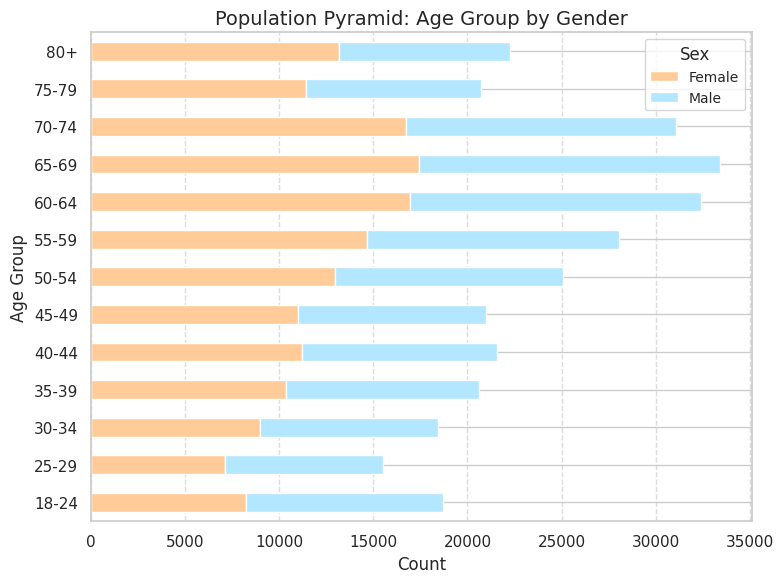

In [ ]:
# prompt: chart for age distribution amd gender in light colour template

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (your existing code)

# Improved Population Pyramid with light colors
def create_population_pyramid(df):
    age_sex_data = df.groupby(['Age_Category', 'Sex']).size().unstack()

    # Light colors for better contrast
    colors = ['#FFCC99', '#B3E6FF'] # Pastel orange and light blue

    age_sex_data.plot(kind='barh', stacked=True, figsize=(8, 6), color=colors)
    plt.title('Population Pyramid: Age Group by Gender', fontsize=14)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel('Age Group', fontsize=12)
    plt.legend(title='Sex', fontsize=10)
    plt.grid(axis='x', linestyle='--', alpha=0.7) # Adding a subtle grid
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()


create_population_pyramid(df)

In [ ]:
# prompt: def create_population_pyramid(df):
#     age_sex_data = df.groupby(['Age_Category', 'Sex']).size().unstack()
#     # Separate male and female data for cleaner plotting
#     male_data = age_sex_data['Male']
#     female_data = age_sex_data['Female']
#     fig, axes = plt.subplots(figsize=(4,4))
#     # Plot male data on the right side of the pyramid
#     axes.barh(age_sex_data.index, male_data, height=0.8, label='Male', color='#4169E1')
#     # Plot female data on the left side of the pyramid
#     axes.barh(age_sex_data.index, -female_data, height=0.8, label='Female', color='#FF69B4')
#     axes.set_title('Population Pyramid: Age Group by Gender')
#     axes.set_xlabel('Count')
#     axes.set_ylabel('Age Group')
#     axes.legend()
#     # Set x-axis ticks to be symmetrical around 0
#     axes.set_xticks(axes.get_xticks())
#     plt.show()
# create_population_pyramid(df) .visualize in coolwarm template

import matplotlib.pyplot as plt

def create_population_pyramid(df):
    age_sex_data = df.groupby(['Age_Category', 'Sex']).size().unstack()
    # Separate male and female data for cleaner plotting
    male_data = age_sex_data['Male']
    female_data = age_sex_data['Female']
    fig, axes = plt.subplots(figsize=(8, 6))
    # Plot male data on the right side of the pyramid
    axes.barh(age_sex_data.index, male_data, height=0.8, label='Male', color='#4169E1')
    # Plot female data on the left side of the pyramid
    axes.barh(age_sex_data.index, -female_data, height=0.8, label='Female', color='#FF69B4')
    axes.set_title('Population Pyramid: Age Group by Gender', fontsize=14)
    axes.set_xlabel('Count', fontsize=12)
    axes.set_ylabel('Age Group', fontsize=12)
    axes.legend(fontsize=10)
    # Set x-axis ticks to be symmetrical around 0
    axes.set_xticks(axes.get_xticks())
    # Adding a subtle grid
    axes.grid(axis='x', linestyle='--', alpha=0.7)
    # Adjust layout to prevent labels from overlapping
    plt.tight_layout()
    plt.show()

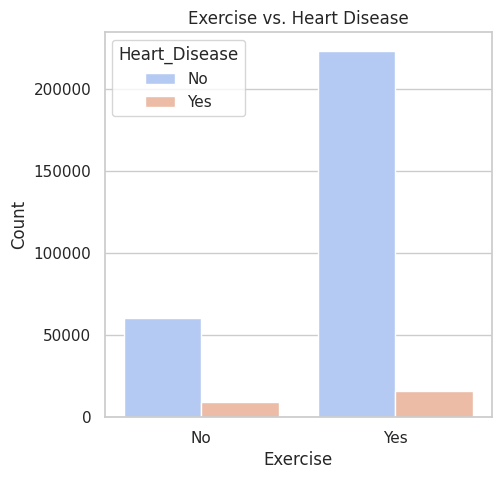

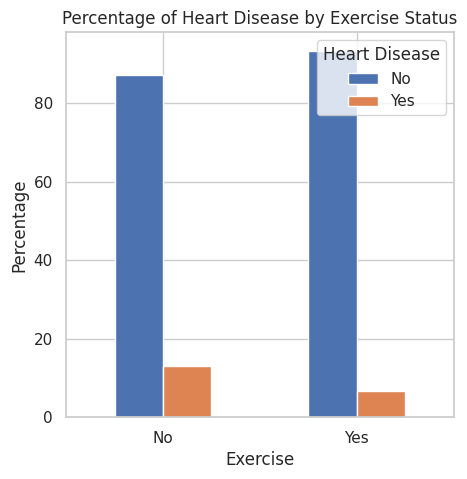

In [ ]:
# prompt: chart for relation between exercise and heart disease,no scatterplot

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it contains 'Exercise' and 'Heart_Disease' columns.

# 1. Countplot: Exercise vs. Heart Disease
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='Exercise', hue='Heart_Disease', palette='coolwarm')
plt.title('Exercise vs. Heart Disease')
plt.xlabel('Exercise')
plt.ylabel('Count')
plt.show()


# 2. Grouped Bar Chart: Heart Disease by Exercise
exercise_heart_disease = df.groupby('Exercise')['Heart_Disease'].value_counts(normalize=True).unstack() * 100
exercise_heart_disease.plot(kind='bar', figsize=(5, 5))
plt.title('Percentage of Heart Disease by Exercise Status')
plt.xlabel('Exercise')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Heart Disease')
plt.show()

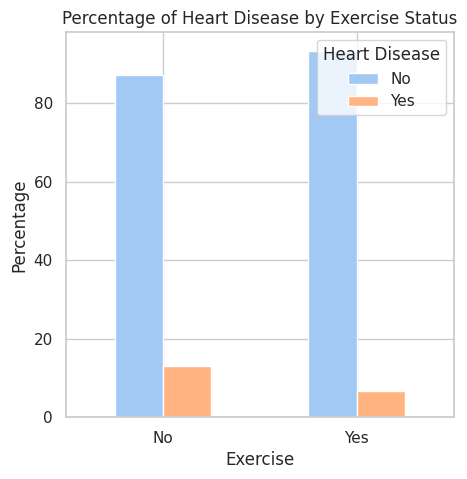

In [ ]:
# prompt: exercise_heart_disease = df.groupby('Exercise')['Heart_Disease'].value_counts(normalize=True).unstack() * 100
# exercise_heart_disease.plot(kind='bar', figsize=(5, 5))
# plt.title('Percentage of Heart Disease by Exercise Status')
# plt.xlabel('Exercise')
# plt.ylabel('Percentage')
# plt.xticks(rotation=0)
# plt.legend(title='Heart Disease')
# plt.show() in light colour template

# Set a light color palette for the plot
sns.set_palette("pastel")

# Assuming 'df' is your DataFrame and it contains 'Exercise' and 'Heart_Disease' columns.

# 2. Grouped Bar Chart: Heart Disease by Exercise
exercise_heart_disease = df.groupby('Exercise')['Heart_Disease'].value_counts(normalize=True).unstack() * 100
exercise_heart_disease.plot(kind='bar', figsize=(5, 5))
plt.title('Percentage of Heart Disease by Exercise Status')
plt.xlabel('Exercise')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Heart Disease')
plt.show()

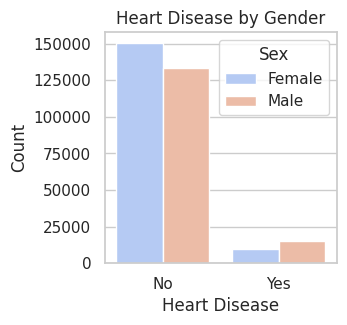

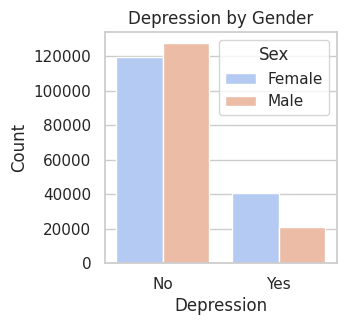

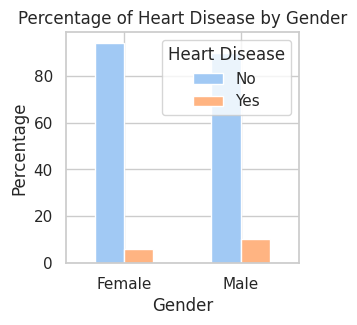

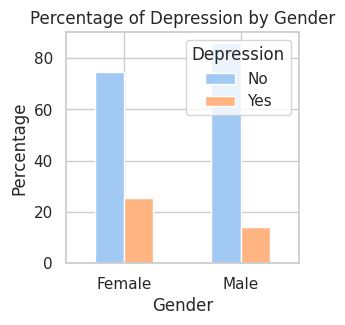

Heart_Disease      No           Yes      
Depression         No    Yes     No   Yes
Sex                                      
Female         112758  37540   6593  3305
Male           115325  18260  12277  2796

In [ ]:
# prompt: relation between gender and heart disease and depression

# Assuming 'df' is your DataFrame and it contains 'Sex', 'Heart_Disease', and 'Depression' columns.

# 1. Countplot: Heart Disease by Gender
plt.figure(figsize=(3,3))
sns.countplot(data=df, x='Heart_Disease', hue='Sex', palette='coolwarm')
plt.title('Heart Disease by Gender')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

# 2. Countplot: Depression by Gender
plt.figure(figsize=(3, 3))
sns.countplot(data=df, x='Depression', hue='Sex', palette='coolwarm')
plt.title('Depression by Gender')
plt.xlabel('Depression')
plt.ylabel('Count')
plt.show()

# 3. Grouped Bar Chart: Heart Disease by Gender
gender_heart_disease = df.groupby('Sex')['Heart_Disease'].value_counts(normalize=True).unstack() * 100
gender_heart_disease.plot(kind='bar', figsize=(3, 3))
plt.title('Percentage of Heart Disease by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Heart Disease')
plt.show()

# 4. Grouped Bar Chart: Depression by Gender
gender_depression = df.groupby('Sex')['Depression'].value_counts(normalize=True).unstack() * 100
gender_depression.plot(kind='bar', figsize=(3, 3))
plt.title('Percentage of Depression by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Depression')
plt.show()

# 5. Contingency Table: Gender vs. Heart Disease and Depression
contingency_table = pd.crosstab(df['Sex'], [df['Heart_Disease'], df['Depression']])
contingency_table

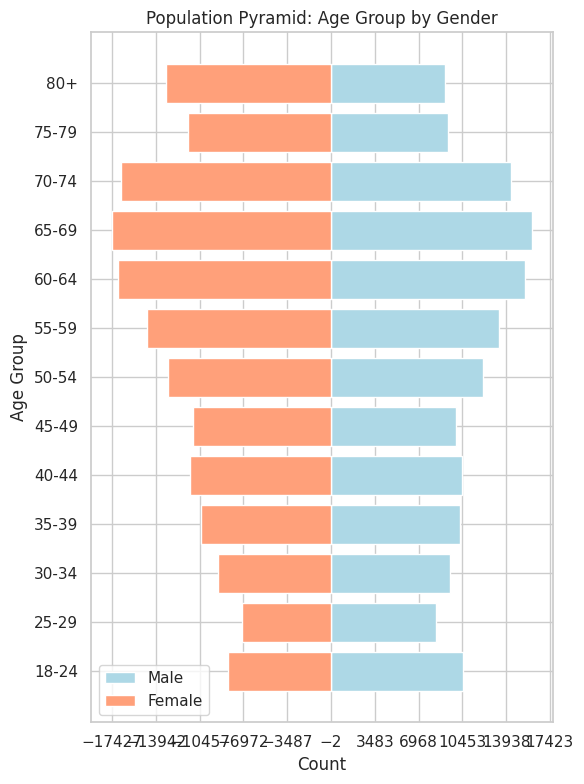

In [ ]:
import matplotlib.pyplot as plt

def create_population_pyramid(df):
    # Group data by Age_Category and Sex
    age_sex_data = df.groupby(['Age_Category', 'Sex']).size().unstack()

    # Separate male and female data for cleaner plotting
    male_data = age_sex_data['Male']
    female_data = age_sex_data['Female']

    fig, axes = plt.subplots(figsize=(6, 8))

    # Plot male data on the right side of the pyramid
    axes.barh(age_sex_data.index, male_data, height=0.8, label='Male', color='#ADD8E6')  # Light Blue

    # Plot female data on the left side of the pyramid
    axes.barh(age_sex_data.index, -female_data, height=0.8, label='Female', color='#FFA07A')  # Light Orange

    axes.set_title('Population Pyramid: Age Group by Gender')
    axes.set_xlabel('Count')
    axes.set_ylabel('Age Group')
    axes.legend()

    # Set x-axis ticks to be symmetrical around 0
    max_value = max(male_data.max(), female_data.max())
    axes.set_xticks(range(-max_value, max_value + 1, max(1, max_value // 5)))

    plt.tight_layout()
    plt.show()

# Call the function with your DataFrame
create_population_pyramid(df)


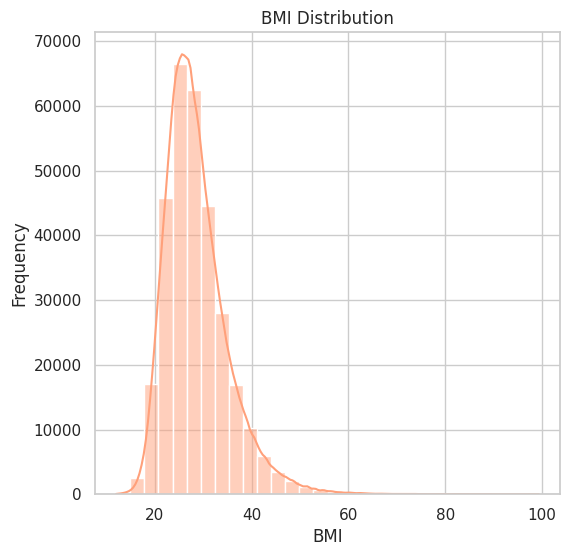

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
# Plot BMI distribution with light blue color
sns.histplot(df['BMI'], kde=True, color='#FFA07A', bins=30)  # Light blue color
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()
